<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Reto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Input, Convolution2D, MaxPooling2D,Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [2]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [3]:
# Show the shape of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
# Build the model
modelo = Sequential()
modelo.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelo.add(MaxPooling2D(strides=(2,2)))
modelo.add(Convolution2D(64, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(strides=(2,2)))
modelo.add(Convolution2D(64, (3, 3), activation='relu'))
modelo.add(Flatten()) #Flatten
modelo.add(Dense(64, activation="relu"))
modelo.add(Dense(10, activation="softmax"))


In [7]:
#summary
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [8]:
#compile the model
modelo.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [10]:
# Train the model
history = modelo.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
313/313 [==============================] - 58s 167ms/step - loss: 1.6406 - accuracy: 0.4014 - val_loss: 1.4740 - val_accuracy: 0.4615
Epoch 2/10
313/313 [==============================] - 55s 177ms/step - loss: 1.2810 - accuracy: 0.5404 - val_loss: 1.1846 - val_accuracy: 0.5808
Epoch 3/10
313/313 [==============================] - 55s 176ms/step - loss: 1.1287 - accuracy: 0.6015 - val_loss: 1.1278 - val_accuracy: 0.6010
Epoch 4/10
313/313 [==============================] - 51s 164ms/step - loss: 1.0303 - accuracy: 0.6377 - val_loss: 1.0222 - val_accuracy: 0.6425
Epoch 5/10
313/313 [==============================] - 51s 163ms/step - loss: 0.9618 - accuracy: 0.6647 - val_loss: 0.9926 - val_accuracy: 0.6518
Epoch 6/10
313/313 [==============================] - 51s 164ms/step - loss: 0.9013 - accuracy: 0.6891 - val_loss: 0.9475 - val_accuracy: 0.6732
Epoch 7/10
313/313 [==============================] - 52s 166ms/step - loss: 0.8495 - accuracy: 0.7049 - val_loss: 0.9491 - val_ac

In [11]:
# Evaluate the model
evaluacion = modelo.evaluate(x_test, y_test)
print(evaluacion)

313/313 [==============================] - 6s 18ms/step - loss: 0.9540 - accuracy: 0.6783
[0.9539977312088013, 0.6783000230789185]


In [12]:
# Predictions
prediccion = modelo.predict(x_test)
reales = np.argmax(y_test, axis=1)
prediccion = np.argmax(prediccion, axis=1)

313/313 [==============================] - 5s 16ms/step


In [13]:
# display ranking metrics
print(classification_report(reales, prediccion))

              precision    recall  f1-score   support

           0       0.59      0.83      0.69      1000
           1       0.86      0.77      0.81      1000
           2       0.65      0.52      0.58      1000
           3       0.47      0.56      0.51      1000
           4       0.71      0.57      0.63      1000
           5       0.76      0.40      0.53      1000
           6       0.62      0.88      0.73      1000
           7       0.84      0.64      0.72      1000
           8       0.70      0.86      0.77      1000
           9       0.79      0.75      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.70      0.68      0.67     10000
weighted avg       0.70      0.68      0.67     10000



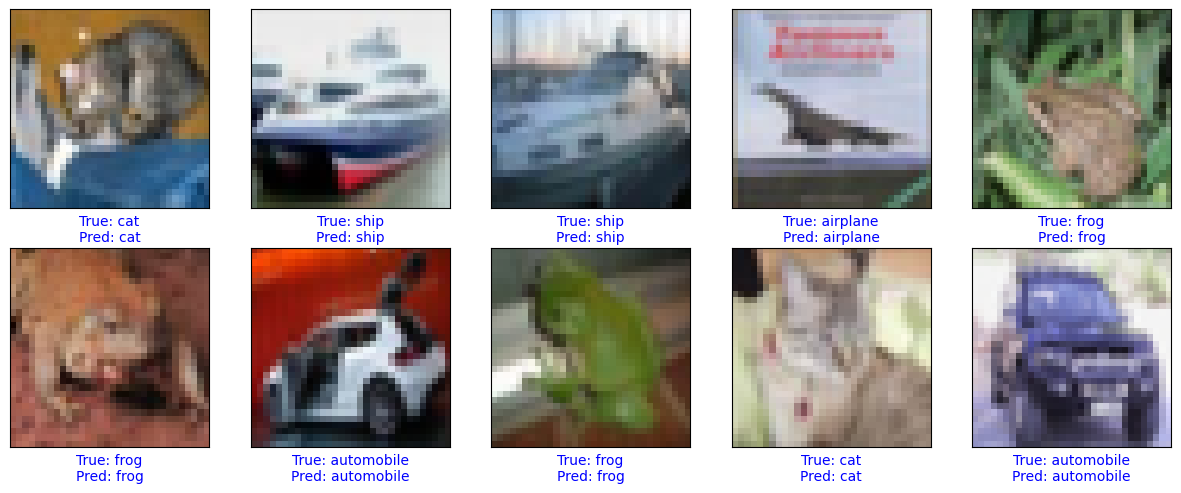

In [14]:
# Función para mostrar imágenes junto con las predicciones
def plot_images(images, true_labels, predicted_labels, class_names, index, num=10):
    plt.figure(figsize=(15, 15))
    for i in range(num):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[index + i], cmap=plt.cm.binary)
        true_label, pred_label = class_names[true_labels[index + i]], class_names[predicted_labels[index + i]]
        color = 'blue' if true_label == pred_label else 'red'
        plt.xlabel(f'True: {true_label}\nPred: {pred_label}', color=color)
    plt.show()

# Nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Mostrar las primeras 10 imágenes de prueba con sus predicciones
plot_images(x_test, reales, prediccion, class_names, 0, num=10)


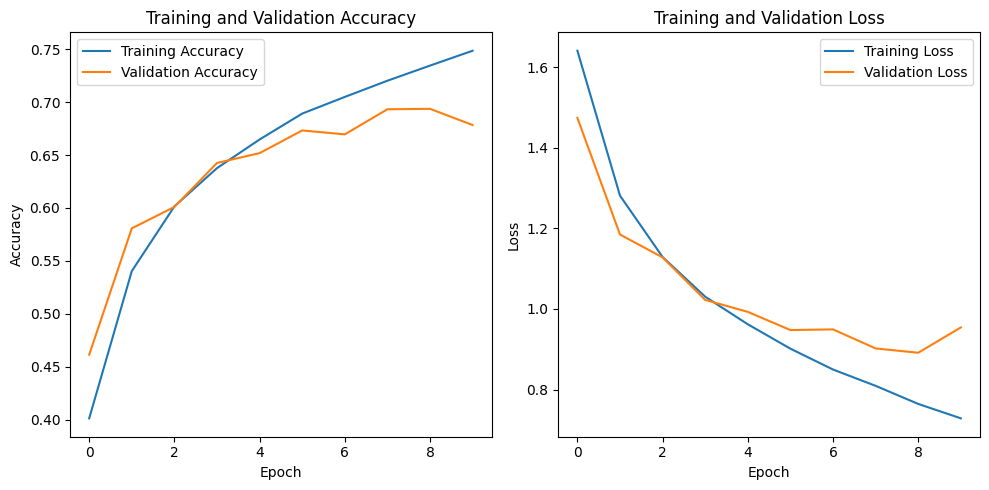

In [15]:


# Get the precision and loss of the model in each epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# graph
plt.figure(figsize=(10, 5))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show graphics
plt.tight_layout()
plt.show()